<a href="https://colab.research.google.com/github/Aquib88raza/image-classification-ANKLE/blob/main/Another_copy_of_ankle_SVMfixed_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to your image directories for healthy and ill samples
normal_path = "/content/drive/MyDrive/Ankle_balance/normal"
ill_path = "/content/drive/MyDrive/Ankle_balance/ill"

# Create lists to store image data and labels
dataset_images = []
dataset_labels = []
dataset_file_names = []
# Reading images from the normal directory
for files in os.listdir(normal_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(normal_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (256, 256)  # Define the size for resizing images (InceptionV3 input size)
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image)
            dataset_labels.append(0)  # Label for healthy images
            dataset_file_names.append(files)
# Reading images from the ill directory
for files in os.listdir(ill_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(ill_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (256, 256)  # Define the size for resizing images (InceptionV3 input size)
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image)
            dataset_labels.append(1)  # Label for ill images
            dataset_file_names.append(files)
# Convert the lists to NumPy arrays
dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)
dataset_file_names = np.array(dataset_file_names)
# Normalize pixel values to the range [0, 1]
dataset_images = dataset_images / 255.0

seed = 42  # You can use any integer value as the seed
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset_images, dataset_labels, test_size=0.2, random_state=seed)


# Calculate the total number of images
total_images = len(dataset_images)
print("Total number of images:", total_images)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset_images, dataset_labels, test_size=0.2, random_state=seed)


# Calculate the number of images in the training set
num_train_images = len(X_train)
print("Number of images in the training set:", num_train_images)

# Calculate the number of images in the testing set
num_test_images = len(X_test)
print("Number of images in the testing set:", num_test_images)

# Print the names of each test and train data
print("\nTrain file names:")
print(train_file_names)

print("\nTest file names:")
print(test_file_names)



Total number of images: 144
Number of images in the training set: 115
Number of images in the testing set: 29

Train file names:
['CCH-059-7-ankle-SL1.jpg' 'CCH-N-043-8-ankle-SR1.jpg'
 'CCH-N-057-8-ankle-SR1.jpg' 'CCH-N-044-8- ankle-SR3.jpg'
 'CCH-N-029-8-ankle-FR1.jpg' 'CCH-N-026-8-ankle-FL3.jpg'
 'CCH-N-036-8-ankle-SR2.jpg' 'CCH-P-035-8-ankle-SL2.jpg'
 'CCH-N-065-7-ankle-FL1.jpg' 'CCH-L-032-8-ankle-FR1.jpg'
 'CCH-E-019-8-ankle-SR3.jpg' 'CCH-N-048-8-ankle-SL1.jpg'
 'CCH-N-009-8-ankle FL1.jpg' 'CCH-N-018-8-ankle-SR2.jpg'
 'CCH-N-056-8-ankle-SL.jpg' 'CCH-N-037-8-ankle-SR2.jpg'
 'CCH-N-063-7-ankle-FL1.jpg' 'CCH-M-049-8-ankle-SR1.jpg'
 'CCH-N-034-8-ankle-FR1.jpg' 'CCH-N-034-8-ankle-SR4.jpg'
 'CCH-N-033-8-ankle-SL2.jpg' 'CCH-L-048-8-ankle-SR2.jpg'
 'CCH-059-7-ankle-FR2.jpg' 'CCH-N-066-7- ankle-FL1.jpg'
 'CCH-N-027-8-ankle-SR3.jpg' 'CCH-N-048-8-ankle-FL1.jpg'
 'CCH-N-063-7-ankle-FR1.jpg' 'CCH-N-033-8-ankle-FL3.jpg'
 'CCH-B-073-2-ankle-FR1.jpg' 'CCH-N-006-8-ankle-SL2.jpg'
 'CCH-N-052-8-ankle

In [ ]:
# Define the path to your image directories for healthy and ill samples
normal_path = "/content/drive/MyDrive/Ankle_balance/normal"
ill_path = "/content/drive/MyDrive/Ankle_balance/ill"

# Create lists to store image data, labels, and file names
dataset_images = []
dataset_labels = []


# Reading images from the normal directory
for files in os.listdir(normal_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(normal_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (256, 256)  # Define the size for resizing images (InceptionV3 input size)
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image)
            dataset_labels.append(0)  # Label for healthy images
            dataset_file_names.append(files)

# Reading images from the ill directory
for files in os.listdir(ill_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(ill_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (256, 256)  # Define the size for resizing images (InceptionV3 input size)
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image)
            dataset_labels.append(1)  # Label for ill images
            dataset_file_names.append(files)

# Convert the lists to NumPy arrays
dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)
dataset_file_names = np.array(dataset_file_names)

# Normalize pixel values to the range [0, 1]
dataset_images = dataset_images / 255.0


seed = 42  # You can use any integer value as the seed
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, train_file_names, test_file_names = train_test_split(
    dataset_images, dataset_labels, dataset_file_names, test_size=0.2, random_state=seed
)

# Calculate the total number of images
total_images = len(dataset_images)
print("Total number of images:", total_images)
# Split the dataset into training and testing sets

# Calculate the number of images in the training set
num_train_images = len(X_train)
print("Number of images in the training set:", num_train_images)

# Calculate the number of images in the testing set
num_test_images = len(X_test)
print("Number of images in the testing set:", num_test_images)

# Print the names of each test and train data
print("\nTrain file names:")
print(train_file_names)

print("\nTest file names:")
print(test_file_names)

Total number of images: 144
Number of images in the training set: 115
Number of images in the testing set: 29

Train file names:
['CCH-059-7-ankle-SL1.jpg' 'CCH-N-043-8-ankle-SR1.jpg'
 'CCH-N-057-8-ankle-SR1.jpg' 'CCH-N-044-8- ankle-SR3.jpg'
 'CCH-N-029-8-ankle-FR1.jpg' 'CCH-N-026-8-ankle-FL3.jpg'
 'CCH-N-036-8-ankle-SR2.jpg' 'CCH-P-035-8-ankle-SL2.jpg'
 'CCH-N-065-7-ankle-FL1.jpg' 'CCH-L-032-8-ankle-FR1.jpg'
 'CCH-E-019-8-ankle-SR3.jpg' 'CCH-N-048-8-ankle-SL1.jpg'
 'CCH-N-009-8-ankle FL1.jpg' 'CCH-N-018-8-ankle-SR2.jpg'
 'CCH-N-056-8-ankle-SL.jpg' 'CCH-N-037-8-ankle-SR2.jpg'
 'CCH-N-063-7-ankle-FL1.jpg' 'CCH-M-049-8-ankle-SR1.jpg'
 'CCH-N-034-8-ankle-FR1.jpg' 'CCH-N-034-8-ankle-SR4.jpg'
 'CCH-N-033-8-ankle-SL2.jpg' 'CCH-L-048-8-ankle-SR2.jpg'
 'CCH-059-7-ankle-FR2.jpg' 'CCH-N-066-7- ankle-FL1.jpg'
 'CCH-N-027-8-ankle-SR3.jpg' 'CCH-N-048-8-ankle-FL1.jpg'
 'CCH-N-063-7-ankle-FR1.jpg' 'CCH-N-033-8-ankle-FL3.jpg'
 'CCH-B-073-2-ankle-FR1.jpg' 'CCH-N-006-8-ankle-SL2.jpg'
 'CCH-N-052-8-ankle

Epoch 1/10
4/4 [==============================] - 29s 6s/step - loss: 0.6803 - accuracy: 0.5913 - val_loss: 0.5725 - val_accuracy: 0.7586
Epoch 2/10
4/4 [==============================] - 22s 6s/step - loss: 0.5451 - accuracy: 0.7565 - val_loss: 0.5345 - val_accuracy: 0.7586
Epoch 3/10
4/4 [==============================] - 24s 6s/step - loss: 0.4726 - accuracy: 0.7826 - val_loss: 0.5019 - val_accuracy: 0.7586
Epoch 4/10
4/4 [==============================] - 21s 5s/step - loss: 0.4413 - accuracy: 0.8087 - val_loss: 0.4851 - val_accuracy: 0.7586
Epoch 5/10
4/4 [==============================] - 20s 5s/step - loss: 0.3993 - accuracy: 0.8348 - val_loss: 0.4685 - val_accuracy: 0.7931
Epoch 6/10
4/4 [==============================] - 23s 6s/step - loss: 0.3716 - accuracy: 0.8696 - val_loss: 0.4489 - val_accuracy: 0.7586
Epoch 7/10
4/4 [==============================] - 22s 6s/step - loss: 0.3407 - accuracy: 0.8783 - val_loss: 0.4388 - val_accuracy: 0.7931
Epoch 8/10
4/4 [==================

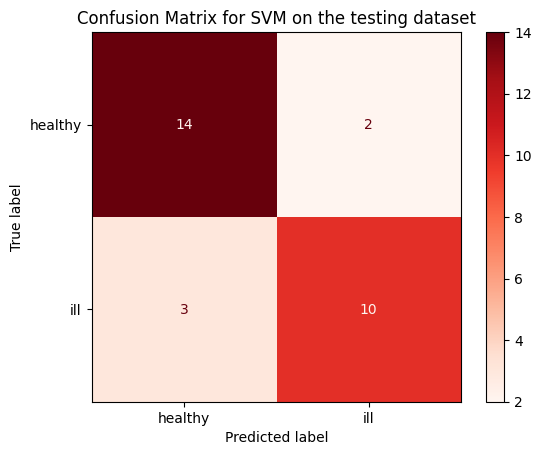

In [ ]:
# Create an InceptionV3 model for feature extraction
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(256, 256, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the InceptionV3-based model on the training dataset
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Extract features from the InceptionV3-based model for both training and testing datasets
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Apply Principal Component Analysis (PCA) to reduce dimensionality
n_components = min(X_train_features.shape[0], X_train_features.shape[1])  # Set it to the minimum
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_features)
X_test_pca = pca.transform(X_test_features)

# ... (Previous code remains the same)

# Define the fixed hyperparameters for SVM
C_fixed = 1
class_weight_fixed = None
gamma_fixed = 'scale'
kernel_fixed = 'linear'

# Create the SVM classifier with fixed hyperparameters
svm_classifier = SVC(C=C_fixed, class_weight=class_weight_fixed, gamma=gamma_fixed, kernel=kernel_fixed)

# Train the SVM model on the training dataset with PCA features
svm_classifier.fit(X_train_pca, y_train)

# Predict on the testing dataset
y_test_pred = svm_classifier.predict(X_test_pca)

# Generate classification report for the testing dataset
test_report = classification_report(y_test, y_test_pred)
print("Classification Report for SVM on the testing dataset:\n", test_report)

# Calculate the confusion matrix for the testing dataset
test_cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix for the testing dataset
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["healthy", "ill"])
test_disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix for SVM on the testing dataset")
plt.show()


Classification Report for SVM on the training dataset:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        56
           1       0.95      0.92      0.93        59

    accuracy                           0.93       115
   macro avg       0.93      0.93      0.93       115
weighted avg       0.93      0.93      0.93       115



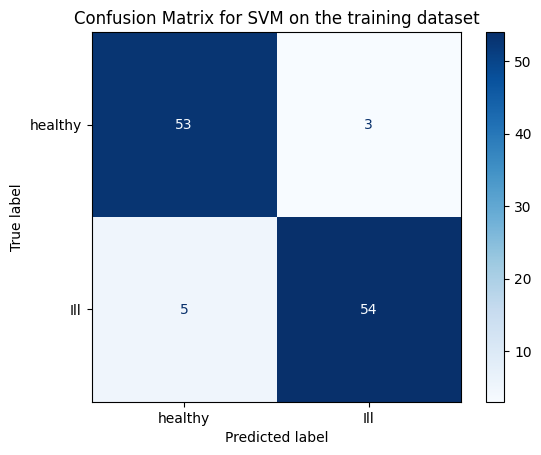

In [ ]:
# Predict on the training dataset using the best SVM classifier with PCA features
y_train_pred = svm_classifier.predict(X_train_pca)

# Generate classification report for the training dataset
train_report = classification_report(y_train, y_train_pred)
print("Classification Report for SVM on the training dataset:\n", train_report)

# Calculate the confusion matrix for the training dataset
train_cm = confusion_matrix(y_train, y_train_pred)

# Display the confusion matrix for the training dataset
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["healthy", "Ill"])
train_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM on the training dataset")
plt.show()

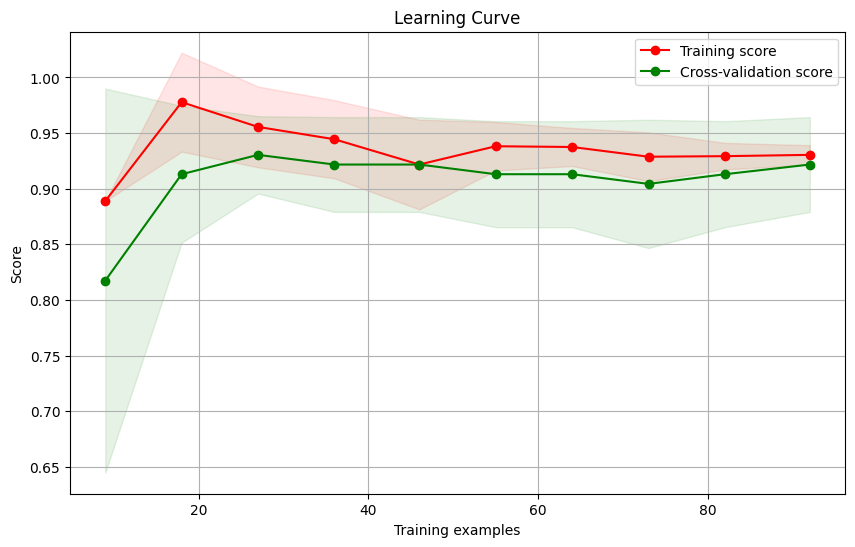

In [ ]:
from sklearn.model_selection import learning_curve
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_classifier, X_train_pca, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

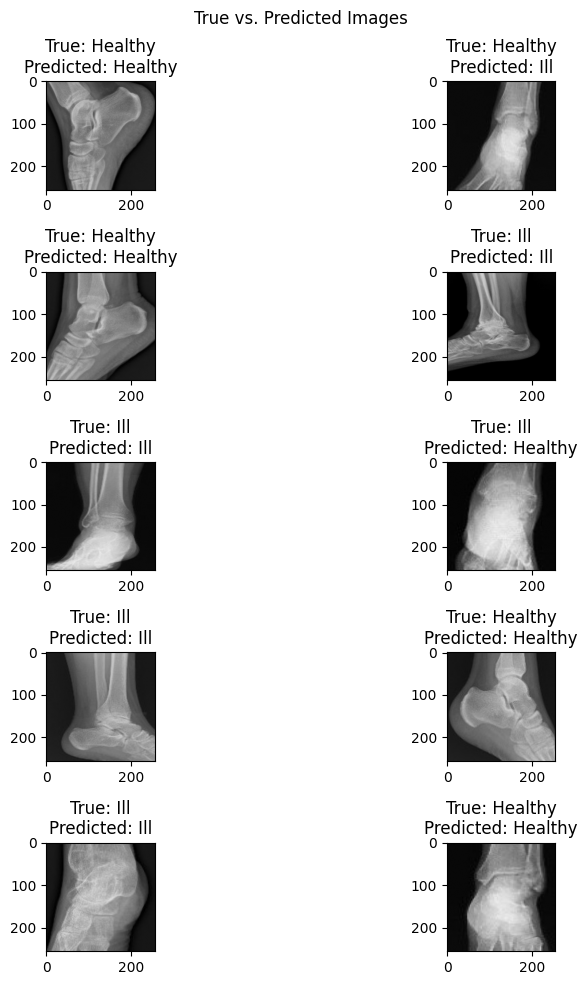

In [ ]:
import random

# Randomly select some images for display (e.g., 10 images)
num_samples_to_display = 10
random_indices = random.sample(range(len(X_test)), num_samples_to_display)

# Create a figure to display the images
plt.figure(figsize=(10, 10))
plt.suptitle("True vs. Predicted Images")

# Define the number of rows and columns for image display
num_rows = 5
num_cols = 2

for i, index in enumerate(random_indices):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_test[index])  # Display the image
    true_label = "Healthy" if y_test[index] == 0 else "Ill"
    predicted_label = "Healthy" if y_test_pred[index] == 0 else "Ill"
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()


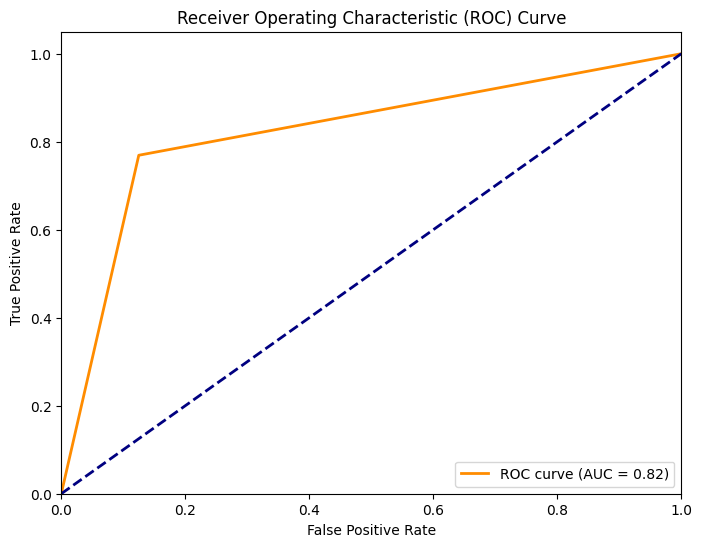

AUC (Area Under the Curve): 0.82


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Calculate ROC curve for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Calculate AUC for testing data
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display AUC value
print("AUC (Area Under the Curve): {:.2f}".format(roc_auc))


In [ ]:
# Calculate sensitivity and specificity for the training dataset
tn_train, fp_train, fn_train, tp_train = train_cm.ravel()
sensitivity_train = tp_train / (tp_train + fn_train)
specificity_train = tn_train / (tn_train + fp_train)

print("Sensitivity (Training):", sensitivity_train)
print("Specificity (Training):", specificity_train)

# Calculate sensitivity and specificity for the testing dataset
tn_test, fp_test, fn_test, tp_test = test_cm.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

print("Sensitivity (Testing):", sensitivity_test)
print("Specificity (Testing):", specificity_test)


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation to get cross-validation scores
cross_val_scores = cross_val_score(best_svm_classifier, X_train_pca, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

# Calculate the variance of cross-validation scores
variance = cross_val_scores.var()
print("Cross-Validation Variance:", variance)

# Print the classification report for the training dataset
train_report = classification_report(y_train, y_train_pred)
print("Classification Report for SVM on the training dataset:\n", train_report)






In [ ]:
# Import functions for calculating sensitivity and specificity
from sklearn.metrics import recall_score, precision_score

# Display the confusion matrix for the testing dataset
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["healthy", "Ill"])
test_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM on the testing dataset")
plt.show()

# Calculate sensitivity and specificity
sensitivity = recall_score(y_test, y_test_pred)
specificity = recall_score(y_test, y_test_pred, pos_label=0)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

# Plot the learning curve accuracy
plt.figure(figsize=(10, 6))
plt.title("Learning Curve Accuracy")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation accuracy")

plt.legend(loc="best")
plt.show()


In [ ]:
# Display the confusion matrix for the testing dataset
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["healthy", "Ill"])
test_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM on the testing dataset")
plt.show()

# Calculate sensitivity and specificity for testing data
sensitivity_test = recall_score(y_test, y_test_pred)
specificity_test = recall_score(y_test, y_test_pred, pos_label=0)

print("Sensitivity (True Positive Rate) - Testing:", sensitivity_test)
print("Specificity (True Negative Rate) - Testing:", specificity_test)

# Display the confusion matrix for the training dataset
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["healthy", "Ill"])
train_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM on the training dataset")
plt.show()

# Calculate sensitivity and specificity for training data
sensitivity_train = recall_score(y_train, y_train_pred)
specificity_train = recall_score(y_train, y_train_pred, pos_label=0)

print("Sensitivity (True Positive Rate) - Training:", sensitivity_train)
print("Specificity (True Negative Rate) - Training:", specificity_train)

# Plot the learning curve accuracy for both training and testing data
plt.figure(figsize=(10, 6))
plt.title("Learning Curve Accuracy")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation accuracy")

plt.legend(loc="best")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Print classification report for the testing dataset with sensitivity and specificity
test_report = classification_report(y_test, y_test_pred, target_names=["healthy", "Ill"])

# Calculate sensitivity and specificity for testing data
sensitivity_test = recall_score(y_test, y_test_pred)
specificity_test = recall_score(y_test, y_test_pred, pos_label=0)

print("Classification Report - Testing:\n", test_report)
print("Sensitivity (True Positive Rate) - Testing:", sensitivity_test)
print("Specificity (True Negative Rate) - Testing:", specificity_test)

# Print classification report for the training dataset with sensitivity and specificity
train_report = classification_report(y_train, y_train_pred, target_names=["healthy", "Ill"])

# Calculate sensitivity and specificity for training data
sensitivity_train = recall_score(y_train, y_train_pred)
specificity_train = recall_score(y_train, y_train_pred, pos_label=0)

print("Classification Report - Training:\n", train_report)
print("Sensitivity (True Positive Rate) - Training:", sensitivity_train)
print("Specificity (True Negative Rate) - Training:", specificity_train)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

# Calculate sensitivity and specificity for testing data
sensitivity_test = recall_score(y_test, y_test_pred)
specificity_test = recall_score(y_test, y_test_pred, pos_label=0)

# Define a custom color map with purple and white colors
custom_cmap = plt.cm.colors.ListedColormap(['white', 'purple'])

# Display the confusion matrix for the testing dataset with custom color map
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["healthy", "Ill"])
test_disp.plot(cmap=custom_cmap)
plt.title("Confusion Matrix for SVM on the testing dataset")
plt.show()

# Calculate sensitivity and specificity for training data
sensitivity_train = recall_score(y_train, y_train_pred)
specificity_train = recall_score(y_train, y_train_pred, pos_label=0)

# Display the confusion matrix for the training dataset with custom color map
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["healthy", "Ill"])
train_disp.plot(cmap=custom_cmap)
plt.title("Confusion Matrix for SVM on the training dataset")
plt.show()

# Print classification report for the testing dataset with sensitivity and specificity, and classification names
test_report = classification_report(y_test, y_test_pred, target_names=["healthy", "Ill"],
                                   output_dict=True)

# Print classification report for the training dataset with sensitivity and specificity, and classification names
train_report = classification_report(y_train, y_train_pred, target_names=["healthy", "Ill"],
                                    output_dict=True)

print("Classification Report - Testing:")
print("Healthy:")
print("  Sensitivity (True Positive Rate) - Testing:", test_report["healthy"]["recall"])
print("  Specificity (True Negative Rate) - Testing:", specificity_test)
print("Ill:")
print("  Sensitivity (True Positive Rate) - Testing:", test_report["Ill"]["recall"])
print("  Specificity (True Negative Rate) - Testing:", specificity_test)

print("\nClassification Report - Training:")
print("Healthy:")
print("  Sensitivity (True Positive Rate) - Training:", train_report["healthy"]["recall"])
print("  Specificity (True Negative Rate) - Training:", specificity_train)
print("Ill:")
print("  Sensitivity (True Positive Rate) - Training:", train_report["Ill"]["recall"])
print("  Specificity (True Negative Rate) - Training:", specificity_train)


In [ ]:
# Calculate the number of healthy and ill data points in the training data
num_healthy = np.sum(y_train == 0)
num_ill = np.sum(y_train == 1)

print("Number of Healthy Samples:", num_healthy)
print("Number of Ill Samples:", num_ill)
